In [1]:
import pandas as pd

In [2]:
storedata=pd.read_csv(r'C:\Users\genus\OneDrive\Documents\flights\samplesuperstoredata.csv')

In [3]:
storedata.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
for row,index in storedata.iterrows():
    print(index['Second Class'])

KeyError: 'Second Class'

In [5]:
storedata.Profit

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

In [6]:
storedata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
storedata.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
storedata.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [10]:
storedata.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

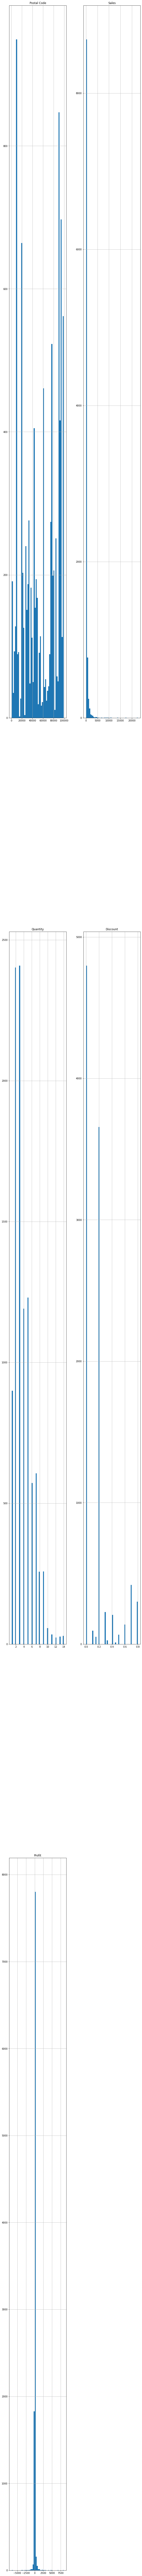

In [11]:
storedata.hist(bins=50,figsize=(10,200))

In [12]:
objectcolumnslist=[]
for column in storedata.columns:
    if (storedata[column].dtype=='object'):
        objectcolumnslist.append(column)

In [13]:
numericcolumnslist=[]
for column in storedata.columns:
    if (storedata[column].dtype=='int64' or storedata[column].dtype=='float64'):
        numericcolumnslist.append(column)

In [14]:
numericcolumnslist

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [15]:
target=storedata['Profit']

In [16]:
numericfeatures=storedata[numericcolumnslist]

In [17]:
numericfeatures=numericfeatures[['Sales','Quantity','Discount']]

In [18]:
numericfeatures

,Sales,Quantity,Discount
0,261.9600,2,0.00
1,731.9400,3,0.00
2,14.6200,2,0.00
3,957.5775,5,0.45
4,22.3680,2,0.20
...,...,...,...
9989,25.2480,3,0.20
9990,91.9600,2,0.00
9991,258.5760,2,0.20
9992,29.6000,4,0.00


In [19]:
objectcolumnslist

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [20]:
storedatacatvariables=storedata[objectcolumnslist].astype('category')

In [21]:
for column in storedatacatvariables.columns:
    storedatacatvariables[column]=storedatacatvariables[column].cat.codes

In [22]:
storedatacatvariables

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,2,0,0,194,15,2,0,4
1,2,0,0,194,15,2,0,5
2,2,1,0,266,3,3,1,10
3,3,0,0,153,8,2,0,16
4,3,0,0,153,8,2,1,14
...,...,...,...,...,...,...,...,...
9989,2,0,0,295,8,2,0,9
9990,3,0,0,104,3,3,0,9
9991,3,0,0,104,3,3,2,13
9992,3,0,0,104,3,3,1,12


In [23]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
for column in storedatacatvariables.columns:
    storedatacatvariables[column]=encoder.fit_transform(storedatacatvariables[column])

In [24]:
storedatacatvariables

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9989,0,1,0,0,0,0,1,0
9990,0,1,0,0,0,0,1,0
9991,0,1,0,0,0,0,0,0
9992,0,1,0,0,0,0,0,0


In [25]:
features=pd.concat([storedatacatvariables,numericfeatures],axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
x_train=sc.fit_transform(X_train)

In [30]:
X_test=sc.transform(X_test)

In [31]:
X_test

array([[ 2.33850359, -1.0453906 ,  0.        , ...,  0.62938526,
         0.10454081,  0.20561782],
       [-0.42762389,  0.95658025,  0.        , ..., -0.33359239,
        -0.79797466,  0.20561782],
       [-0.42762389, -1.0453906 ,  0.        , ..., -0.33244515,
        -0.79797466, -0.75859826],
       ...,
       [-0.42762389,  0.95658025,  0.        , ..., -0.29112269,
         0.10454081, -0.75859826],
       [-0.42762389,  0.95658025,  0.        , ..., -0.37504637,
        -0.79797466, -0.75859826],
       [-0.42762389,  0.95658025,  0.        , ..., -0.38211613,
        -0.34671692, -0.75859826]])

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
rf=RandomForestRegressor(n_estimators=50)
gb=GradientBoostingRegressor(n_estimators=100)

In [34]:
y_train

2121    -2.6997
3542    -7.0980
4521     6.9088
3774    81.5949
8966    14.4000
         ...   
5734     8.5544
5191    11.5800
5390     9.5526
860      0.1472
7270   -12.8784
Name: Profit, Length: 6695, dtype: float64

In [35]:
!pip install cleanlab

You should consider upgrading via the 'c:\users\genus\onedrive\documents\testfiles\python.exe -m pip install --upgrade pip' command.


In [46]:
import cleanlab
cl = cleanlab.classification.CleanLearning(RandomForestRegressor(n_estimators=50))
label_issues = cl.find_label_issues(X_train, y_train)
cl.fit(X_train, y_train)
clpredict=cl.predict(X_test)
cleanlab.dataset.health_summary(labels, confident_joint=cl.confident_joint)


AttributeError: module 'cleanlab' has no attribute 'regression'

In [39]:
clpredict

NameError: name 'clpredict' is not defined

In [ ]:
rfmodel=rf.fit(X_train,y_train)
gbmodel=gb.fit(X_train,y_train)




In [ ]:
predictions=rfmodel.predict(X_test)

NameError: name 'rfmodel' is not defined

In [ ]:
gbmodel

In [ ]:

str1 = "P@#yn26at^&i5ve"

In [ ]:
import re
letters=re.findall("[Aa-zZ]",str1)
digits=re.findall("\d+",str1)
symbols=re.findall("[@?#$^]",str1)

In [ ]:
newlist=[2,3,4,4,42,42,89]

In [ ]:
digits

['26', '5']

In [ ]:
len(symbols)

3

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [ ]:
mean_absolute_error(predictions,y_test)

65.97363221461049

In [ ]:
storedata['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [ ]:
gbmodel